# Goods Recommandation by the Tompson Sampling-based AI engine

In [1]:
## Declare Packages tu Use 
using Distributions
using Formatting
using Plots
using Zygote
using Random

In [2]:
## Training
N = 3
means_l = [[0.3, 0.7, 0.5], [0.7, 0.3, 0.4]] # rand(N)
disp = false 
Nepoch = 2
proposal_arm_array = zeros(Nepoch)
probs_array = zeros(Nepoch, N)
WB_S = zeros(Float64, (N,2))
WB_F = ones(Float64, (N,2))

3×2 Matrix{Float64}:
 1.0  1.0
 1.0  1.0
 1.0  1.0

In [3]:
WB_S_list = zeros(Float64, (Nepoch+1, N, 2))
WB_S_list[1,:,:] = WB_S
WB_F_list = zeros(Float64, Nepoch+1, N, 2)
WB_F_list[1,:,:] = WB_F

3×2 Matrix{Float64}:
 1.0  1.0
 1.0  1.0
 1.0  1.0

In [12]:
## Basic Functions
function cost_ts(WB_S, WB_F, x::Int)
    # x: 1, 2 (e.g, man, woman)
    S = WB_S[1] * x + WB_S[2]
    F = WB_F[1] * x + WB_F[2]
    probs = rand.(Normal.(S, abs.(F)))
    p_arm = argmax(probs)
    rand(Uniform())<means_l[x][p_arm] ? (1-probs[p_arm])^2 : (0 -probs[p_arm])^2
end

cost_ts (generic function with 1 method)

In [13]:
x = 1
cost_ts(WB_S, WB_F, x)

0.015660706272693725

In [25]:
f = x,y,z -> (x+y)*z 
x,y,z = 1, 1, 5
f(x,y,z)

LoadError: MethodError: objects of type Tuple{Int64, Int64, var"#21#22"} are not callable

In [23]:
f = (x,y,z) -> (x+y)*z 
x,y,z = 1, 1, 5
f(x,y,z)

10

In [24]:
gradient((x,y) -> f(x,y,z),x,y)

(5.0, 5.0)

In [26]:
x = 0
gradient(WB_S, WB_F)cost_ts(WB_S, WB_F, x), WB_S, WB_F)

LoadError: MethodError: objects of type Float64 are not callable
Maybe you forgot to use an operator such as [36m*, ^, %, / etc. [39m?

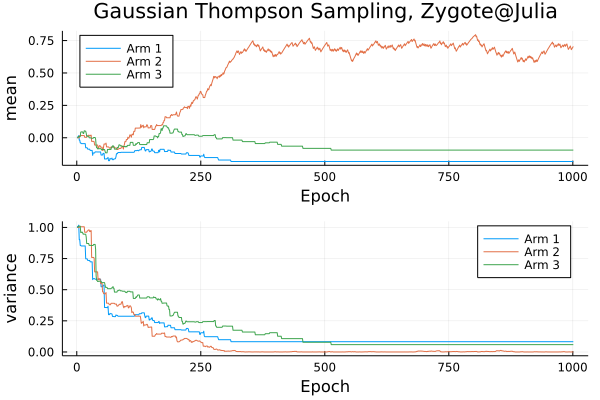

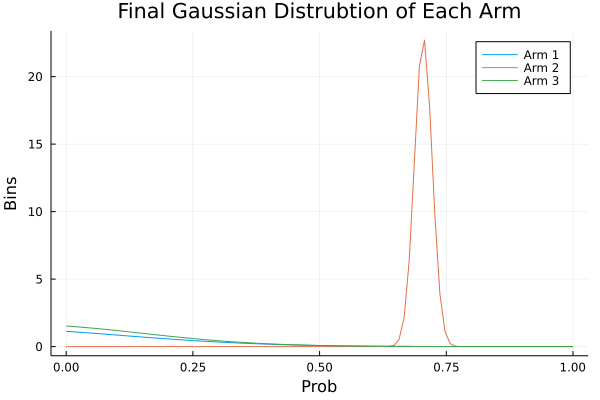

[0.3, 0.7, 0.5]


In [1]:
μ = 0.01
for epoch in range(1, Nepoch)
    G_all = gradient(cost_ts, S, F)
    S -= μ * G_all[1]
    F -= μ * G_all[2]    
    S_list[epoch+1,:] = S    
    F_abs_list[epoch+1,:] = F.^2
end

## Result Plotting
println(means)
p1 = plot(range(1,Nepoch+1), S_list, ylabel="mean", 
    title = "Gaussian Thompson Sampling, Zygote@Julia", legend=:topleft,
    label = ["Arm 1" "Arm 2" "Arm 3"])
p2 = plot(range(1,Nepoch+1), F_abs_list, ylabel="variance",
    label = ["Arm 1" "Arm 2" "Arm 3"])
h = plot(p1, p2, xlabel="Epoch", layout = (2,1))
display(h)

lo, hi = 0., 1.
x = range(lo, hi; length = 100)
Y = []
for i in range(1,N)
    y = pdf.(Normal(S[i],abs.(F[i])),x)
    if i == 1
        Y = y
    else
        Y = [Y y]
    end
end

h = plot(x, Y, xlabel = "Prob", ylabel = "Bins", 
    title = "Final Gaussian Distrubtion of Each Arm", 
    label = ["Arm 1" "Arm 2" "Arm 3"])
display(h)

In [52]:
g(x, N) = x^N
g(2, 10)

1024

In [63]:
dg(x,N) = gradient(x -> g(x,N),x)

dg (generic function with 2 methods)

In [66]:
dg(2, 5)

(80.0,)